In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/My Drive/hw4_rl')

In [4]:
!cp /content/drive/My\ Drive/hw4_rl/gridworld_lec4.py /content/
!cp /content/drive/My\ Drive/hw4_rl/gw_lec4.py /content/

# Problem 1

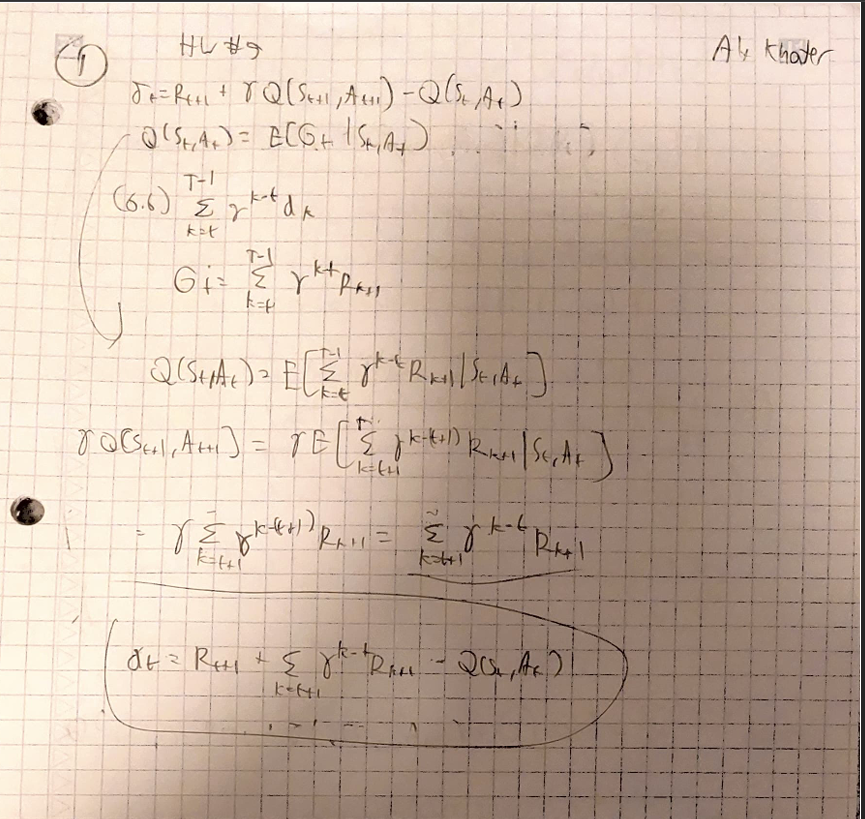

# Problem 2

## SARSA

In [1]:
import numpy as np
from gridworld_lec4 import GridWorld
from gw_lec4 import GridWorld5x5

def sarsa(grid, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000):
    # Q-values for all states and actions
    Q = {}
    for state in grid.all_states():
        Q[state] = {action: 0 for action in grid.actions(state)}

    for episode in range(episodes):
        grid.reset()
        state = grid.get_state()
        actions = grid.actions(state)
        # action A using epsilon-greedy policy
        action = epsilon_greedy(Q, state, actions, epsilon)

        while not grid.game_over():
            next_state, reward = grid.move(action)
            next_actions = grid.actions(next_state)
            # action A' from S'
            next_action = epsilon_greedy(Q, next_state, next_actions, epsilon)

            # Update Q(S, A)
            Q[state][action] += alpha * (
                reward + gamma * Q[next_state][next_action] - Q[state][action]
            )

            # Move to the next state and action
            state = next_state
            action = next_action

    return Q

def epsilon_greedy(Q, state, actions, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        # Choose the action with the highest Q-value
        q_values = [Q[state][action] for action in actions]
        max_q = max(q_values)
        max_actions = [action for action, q in zip(actions, q_values) if q == max_q]
        return np.random.choice(max_actions)

if __name__ == '__main__':
    grid = GridWorld(5, 5, start_position=(0, 0), pass_through_reward=-1,
                     rewards={(2, 0): -100, (4, 4): 100}, probs=GridWorld5x5().probs)

    # Training
    Q = sarsa(grid, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000)

    # Print Q-values
    for state in Q:
        print(f"State {state}: {Q[state]}")


State (0, 1): {'R': 16.539025306406252, 'L': 20.611037229352824, 'D': 41.02107163685301}
State (4, 0): {'R': 61.40905935760917, 'U': 3.8498660900555244}
State (1, 2): {'R': -2.3226351090706117, 'L': 26.868009905985005, 'U': -0.2469864607157013}
State (3, 4): {'L': 8.792701963815997, 'D': 97.21871610556306}
State (0, 4): {'L': -2.460253621367332, 'D': -2.488186171083336}
State (4, 3): {'R': 99.99999999999994, 'L': 70.51301217664148, 'U': 45.90096210424405}
State (3, 1): {'L': 36.077451565360505, 'D': 67.42922945781568, 'U': 43.16890691108556}
State (2, 1): {'L': -97.97244404095547, 'D': 56.79552321981179, 'U': 31.15096277187679}
State (0, 2): {'R': -2.469747756558458, 'L': 25.763373181196947, 'D': -2.396250021793359}
State (1, 0): {'R': 37.23172373511736, 'D': -46.8559, 'U': 11.887398969287087}
State (1, 3): {'R': -2.4062879467988676, 'L': 0.8881600695795309, 'U': -2.402073468197466}
State (4, 1): {'R': 75.90329213571965, 'L': 42.92264424336794, 'U': 50.72777288858521}
State (4, 4): {'L

## SARSA Cartpole

In [13]:
import numpy as np
import gymnasium as gym

# Discretize
def discretize_state(state, bins):
    return tuple(np.digitize(state[i], bins[i]) - 1 for i in range(len(state)))

def create_bins():
    bins = [
        np.linspace(-4.8, 4.8, 10), 
        np.linspace(-5, 5, 10),
        np.linspace(-0.418, 0.418, 10),
        np.linspace(-5, 5, 10)
    ]
    return bins

# Epsilon-greedy policy
def epsilon_greedy(Q, state, epsilon, n_actions):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)  # Explore
    else:
        return np.argmax(Q[state])           # Exploit

# SARSA for CartPole
def sarsa_cartpole(alpha=0.1, gamma=0.95, epsilon=0.1, episodes=10000):
    env = gym.make("CartPole-v1")
    bins = create_bins()
    n_actions = env.action_space.n

    # Initialize Q-table with random values
    Q = { (x, y, z, w): [np.random.uniform(-0.01, 0.01) for _ in range(n_actions)]
          for x in range(10) for y in range(10) for z in range(10) for w in range(10) }

    rewards = []

    for episode in range(episodes):
        state = env.reset()[0]
        state = discretize_state(state, bins)
        action = epsilon_greedy(Q, state, epsilon, n_actions)
        total_reward = 0

        done = False
        while not done:
            next_state, reward, done, _, _ = env.step(action)
            next_state = discretize_state(next_state, bins)
            next_action = epsilon_greedy(Q, next_state, epsilon, n_actions)

            # Update Q-value
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])

            state = next_state
            action = next_action
            total_reward += reward

        rewards.append(total_reward)

    env.close()
    
    # Output Q-values
    print("Sample Q-values:")
    for state, actions in list(Q.items())[:10]:  # Show first 10 Q-values
        print(f"State: {state}, Actions: {actions}")

    return rewards, Q

rewards, Q = sarsa_cartpole(episodes=1000)
print(f"Average Reward over 1000 Episodes: {np.mean(rewards)}")


Sample Q-values:
State: (0, 0, 0, 0), Actions: [-0.005460810179423561, 0.006234210881107894]
State: (0, 0, 0, 1), Actions: [-0.00667592491500848, 0.0004555612634081531]
State: (0, 0, 0, 2), Actions: [-0.004834629959788457, -0.0003174666356406345]
State: (0, 0, 0, 3), Actions: [-0.006535848922737655, -0.009556682851003013]
State: (0, 0, 0, 4), Actions: [-0.0005840807020717712, -0.0011087484645907301]
State: (0, 0, 0, 5), Actions: [-0.0010006840400217359, -0.0005691623866585956]
State: (0, 0, 0, 6), Actions: [-0.0008690989728770034, 0.000746892126506327]
State: (0, 0, 0, 7), Actions: [-0.009561451185564682, -0.003603232680433499]
State: (0, 0, 0, 8), Actions: [0.006795072772011834, -0.004608039667126034]
State: (0, 0, 0, 9), Actions: [-0.005390084210819692, 0.003135344516850623]
Average Reward over 1000 Episodes: 22.148


## Qlearning

In [1]:
from gridworld_lec4 import GridWorld
from gw_lec4 import GridWorld5x5 
import numpy as np

def q_learning(grid, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000):
    # Q-values for all states and actions
    Q = {}
    for state in grid.all_states():
        Q[state] = {action: 0 for action in grid.actions(state)}

    for episode in range(episodes):
        grid.reset()
        state = grid.get_state()

        while not grid.game_over():
            actions = grid.actions(state)
            # action A using epsilon-greedy policy
            action = epsilon_greedy(Q, state, actions, epsilon)

            next_state, reward = grid.move(action)
            next_actions = grid.actions(next_state)

            # Q-learning update
            if next_actions:
                max_q = max(Q[next_state][a] for a in next_actions)
            else:
                max_q = 0 

            Q[state][action] += alpha * (
                reward + gamma * max_q - Q[state][action]
            )

            # Move to next state
            state = next_state

    return Q

def epsilon_greedy(Q, state, actions, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        # Choose action with the highest Q-value
        q_values = [Q[state][action] for action in actions]
        max_q = max(q_values)
        max_actions = [action for action, q in zip(actions, q_values) if q == max_q]
        return np.random.choice(max_actions)

if __name__ == '__main__':
    grid = GridWorld5x5(p=0.5)  

    # Training
    Q = q_learning(grid, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000)

    for state in Q:
        print(f"State {state}: {Q[state]}")


State (0, 1): {'R': -9.865333364802648, 'L': -9.873271586792553, 'D': -7.766226525504643}
State (4, 0): {'R': -12.644055482398183, 'U': -19.298078383847557}
State (1, 2): {'R': -9.932816041445017, 'L': -9.903434806800394, 'U': -9.769111235598132}
State (3, 4): {'L': 0, 'D': 0}
State (0, 4): {'L': -9.906346728442069, 'D': -9.913037509453735}
State (4, 3): {'R': 99.8382690730077, 'L': 83.05122479300599, 'U': 39.93587689778771}
State (3, 1): {'L': -9.46348741098928, 'D': -10.739350432172895, 'U': -8.018822484812734}
State (2, 1): {'L': -69.58324617957115, 'D': -8.041866677690031, 'U': -51.15842650257564}
State (0, 2): {'R': -9.644545632154399, 'L': -9.889020594096475, 'D': -9.904569850698163}
State (1, 0): {'R': -62.42411158781849, 'D': -53.06274942282213, 'U': -9.722469611914022}
State (1, 3): {'R': -9.890604341740772, 'L': -9.963646642721695, 'U': -9.877173649396271}
State (4, 1): {'R': 37.82689069398024, 'L': -1.8048845591144447, 'U': 19.71786803165418}
State (4, 4): {'L': 0, 'U': 0}
S

## Qlearning Cartpole

In [15]:
import numpy as np
import gymnasium as gym

def discretize_state(state, bins):
    return tuple(np.digitize(state[i], bins[i]) - 1 for i in range(len(state)))

def create_bins():
    bins = [
        np.linspace(-4.8, 4.8, 10),  
        np.linspace(-5, 5, 10),     
        np.linspace(-0.418, 0.418, 10), 
        np.linspace(-5, 5, 10)     
    ]
    return bins

# Epsilon-greedy policy
def epsilon_greedy(Q, state, epsilon, n_actions):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)  
    else:
        return np.argmax(Q[state])          

# Q-learning for CartPole
def q_learning_cartpole(alpha=0.1, gamma=0.95, epsilon=0.3, episodes=1000):
    env = gym.make("CartPole-v1")
    bins = create_bins()
    n_actions = env.action_space.n

    # Initialize Q-table with small random values
    Q = { (x, y, z, w): [np.random.uniform(-0.01, 0.01) for _ in range(n_actions)]
          for x in range(10) for y in range(10) for z in range(10) for w in range(10) }

    rewards = []

    for episode in range(episodes):
        state = env.reset()[0]
        state = discretize_state(state, bins)
        total_reward = 0
        done = False

        while not done:
            # action using the epsilon-greedy policy
            action = epsilon_greedy(Q, state, epsilon, n_actions)

            # observe the next state and reward
            next_state, reward, done, _, _ = env.step(action)
            next_state = discretize_state(next_state, bins)

            # Q-learning update
            best_next_action = np.argmax(Q[next_state])
            Q[state][action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])

            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    env.close()

    print("Sample Q-values:")
    for state, actions in list(Q.items())[:10]:  # Show the first 10 Q-values
        print(f"State: {state}, Actions: {actions}")

    return rewards, Q

rewards, Q = q_learning_cartpole(episodes=1000)
print(f"Average Reward over 1000 Episodes: {np.mean(rewards)}")


Sample Q-values:
State: (0, 0, 0, 0), Actions: [-0.0012825727672533226, 0.004678678590738308]
State: (0, 0, 0, 1), Actions: [-0.0006808119825816791, -0.008344933868673542]
State: (0, 0, 0, 2), Actions: [-0.007767541485128138, -0.009421297887618595]
State: (0, 0, 0, 3), Actions: [-0.007716315917184631, 0.005692395956204429]
State: (0, 0, 0, 4), Actions: [0.0004141655037809902, 0.001637467270903777]
State: (0, 0, 0, 5), Actions: [-0.005712832801195776, -0.006027003742728821]
State: (0, 0, 0, 6), Actions: [0.008572376918960593, 0.003878509875057532]
State: (0, 0, 0, 7), Actions: [-0.0047521851798604355, 0.0009276946308232874]
State: (0, 0, 0, 8), Actions: [0.0002163089475103394, -0.0027116736634561715]
State: (0, 0, 0, 9), Actions: [0.006815039778797447, -0.0032621730924083155]
Average Reward over 1000 Episodes: 40.864


## Expected SARSA

In [2]:
from gridworld_lec4 import GridWorld
from gw_lec4 import GridWorld5x5  
import numpy as np

def expected_sarsa(grid, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000):
    # Q-values for all states and actions
    Q = {}
    for state in grid.all_states():
        Q[state] = {action: 0 for action in grid.actions(state)}

    for episode in range(episodes):
        grid.reset()
        state = grid.get_state()

        while not grid.game_over():
            actions = grid.actions(state)
            # action A using epsilon-greedy policy
            action = epsilon_greedy(Q, state, actions, epsilon)

            next_state, reward = grid.move(action)
            next_actions = grid.actions(next_state)

            # Calculate the expected value of Q(S', a)
            expected_q = 0
            if next_actions:
                prob = epsilon / len(next_actions) 
                max_action = max(Q[next_state], key=Q[next_state].get)
                for next_action in next_actions:
                    if next_action == max_action:

                        expected_q += (1 - epsilon + prob) * Q[next_state][next_action]
                    else:
                        expected_q += prob * Q[next_state][next_action]

            # Expected Sarsa update rule
            Q[state][action] += alpha * (
                reward + gamma * expected_q - Q[state][action]
            )

            # next state
            state = next_state

    return Q

def epsilon_greedy(Q, state, actions, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        # Choose the action with the highest Q-value
        q_values = [Q[state][action] for action in actions]
        max_q = max(q_values)
        max_actions = [action for action, q in zip(actions, q_values) if q == max_q]
        return np.random.choice(max_actions)

if __name__ == '__main__':
    grid = GridWorld5x5(p=0.5)  

    # Training
    Q = expected_sarsa(grid, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000)

    for state in Q:
        print(f"State {state}: {Q[state]}")


State (0, 1): {'R': 1.3645636048343552, 'L': -1.1316189134821424, 'D': 5.246591466939712}
State (4, 0): {'R': 27.89399775109362, 'U': 18.887657984972453}
State (1, 2): {'R': 3.2114927422508868, 'L': 8.540299760623594, 'U': 2.2968712984695046}
State (3, 4): {'L': 0, 'D': 41.59051232005345}
State (0, 4): {'L': -5.661746917861353, 'D': -5.935463456172489}
State (4, 3): {'R': 99.99999999999994, 'L': 56.77851659430359, 'U': 64.34194952345062}
State (3, 1): {'L': 32.49155893607166, 'D': 38.653308915647095, 'U': 21.95621349194245}
State (2, 1): {'L': 3.2592969580361193, 'D': 20.67804004915098, 'U': 7.668331860940211}
State (0, 2): {'R': -1.7394937478589765, 'L': -1.4804359914312075, 'D': 4.033656327518646}
State (1, 0): {'R': 6.112414803110625, 'D': -96.18479575523054, 'U': -39.518908201938785}
State (1, 3): {'R': -6.041686870133926, 'L': 6.190322311028619, 'U': -2.7936362330650955}
State (4, 1): {'R': 49.558295090281426, 'L': 25.26584426800713, 'U': 27.233904162787468}
State (4, 4): {'L': 0,

# Expected SARSA Cartpole

In [16]:
import numpy as np
import gymnasium as gym

def discretize_state(state, bins):
    return tuple(np.digitize(state[i], bins[i]) - 1 for i in range(len(state)))

def create_bins():
    bins = [
        np.linspace(-4.8, 4.8, 10), 
        np.linspace(-5, 5, 10),      
        np.linspace(-0.418, 0.418, 10),  
        np.linspace(-5, 5, 10)       
    ]
    return bins

# Epsilon-greedy policy
def epsilon_greedy(Q, state, epsilon, n_actions):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)  
    else:
        return np.argmax(Q[state])          

# Calculate the expected Q-value for the next state
def expected_q_value(Q, state, epsilon, n_actions):
    action_probs = np.ones(n_actions) * (epsilon / n_actions)
    best_action = np.argmax(Q[state])
    action_probs[best_action] += (1 - epsilon)
    expected_value = np.dot(action_probs, Q[state])
    return expected_value

# Expected SARSA for CartPole
def expected_sarsa_cartpole(alpha=0.2, gamma=0.99, epsilon=0.3, episodes=1000):
    env = gym.make("CartPole-v1")
    bins = create_bins()
    n_actions = env.action_space.n

    # Initialize Q-table with small random values
    Q = { (x, y, z, w): [np.random.uniform(-0.01, 0.01) for _ in range(n_actions)]
          for x in range(10) for y in range(10) for z in range(10) for w in range(10) }

    rewards = []

    for episode in range(episodes):
        state = env.reset()[0]
        state = discretize_state(state, bins)
        total_reward = 0
        done = False

        while not done:
            # Choose an action
            action = epsilon_greedy(Q, state, epsilon, n_actions)

            # observe the next state and reward
            next_state, reward, done, _, _ = env.step(action)
            next_state = discretize_state(next_state, bins)

            # Calculate the expected Q-value
            expected_q = expected_q_value(Q, next_state, epsilon, n_actions)

            # Expected SARSA update
            Q[state][action] += alpha * (reward + gamma * expected_q - Q[state][action])

            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    env.close()

    print("Sample Q-values:")
    for state, actions in list(Q.items())[:10]:  
        print(f"State: {state}, Actions: {actions}")

    return rewards, Q

rewards, Q = expected_sarsa_cartpole(episodes=1000)
print(f"Average Reward over 1000 Episodes: {np.mean(rewards)}")


Sample Q-values:
State: (0, 0, 0, 0), Actions: [0.00734352080939679, 0.009004706491889706]
State: (0, 0, 0, 1), Actions: [0.005231336770457885, -0.004095248456866421]
State: (0, 0, 0, 2), Actions: [-0.002975526626295244, -0.009224027753991304]
State: (0, 0, 0, 3), Actions: [-0.004945292135031052, 0.005115502892716724]
State: (0, 0, 0, 4), Actions: [-0.009739671663016689, 0.006500854665800337]
State: (0, 0, 0, 5), Actions: [0.0043262446252452375, 0.005710823250533166]
State: (0, 0, 0, 6), Actions: [-0.007849052944098399, -0.002008009853723682]
State: (0, 0, 0, 7), Actions: [0.003815381445880393, -0.0034935081916805813]
State: (0, 0, 0, 8), Actions: [-0.007476967988536238, -0.007969123520356643]
State: (0, 0, 0, 9), Actions: [0.007800122810637059, 0.003710076378080721]
Average Reward over 1000 Episodes: 19.739


# Problem 3

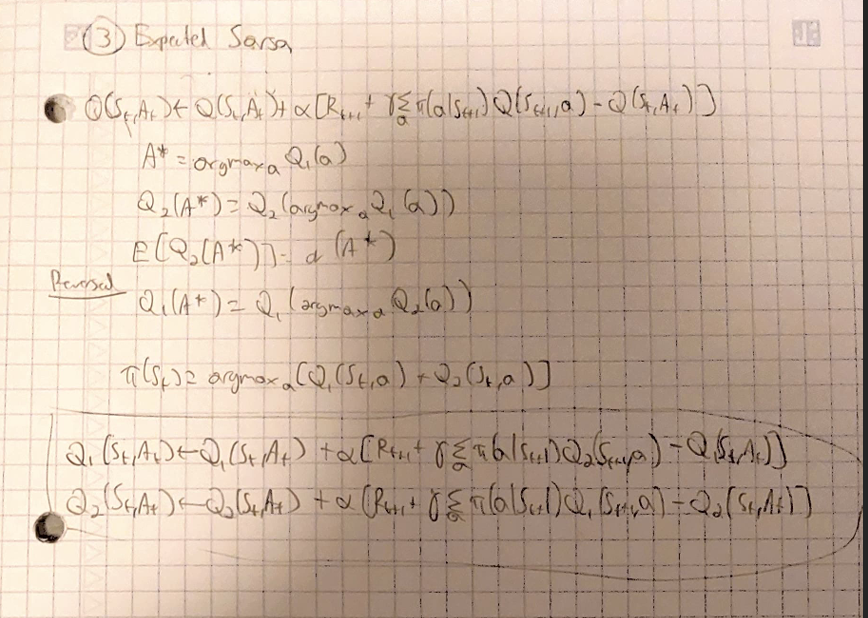

## Problem 4

n=1, RMS Errors: [0.630043145410983, 0.8910946319584462, 1.0915425152901796, 1.2604038620217353, 1.6476747683726418, 1.6536038174845307, 1.7623874205267775, 1.7698723586016767, 2.0633813582708584, 2.070853844024477]
n=2, RMS Errors: [10.47463311181275, 18.142458474763682, 20.94910073507225, 20.952625039881966, 23.425785321787792, 23.591093900324676, 23.585887031786136, 25.77660862887085, 25.46027960700047, 24.868812062207876]
n=4, RMS Errors: [11.161961269188627, 17.649755094670954, 22.323711765508122, 22.323711765930764, 22.32378501468846, 22.32378501468846, 22.32405712095373, 22.32405712095373, 22.324057120955676, 22.202873133351407]
n=8, RMS Errors: [11.714029810460845, 15.121322736927585, 15.121322736927585, 17.891363635946348, 17.891363635946348, 17.955559317166657, 17.955559317166657, 21.431853178472682, 22.079894622147226, 24.669800077598648]
n=16, RMS Errors: [0.0, 0.0, 7.1980813914380795, 7.1980813914380795, 7.1980813914380795, 7.1980813914380795, 11.373887590048975, 11.373887

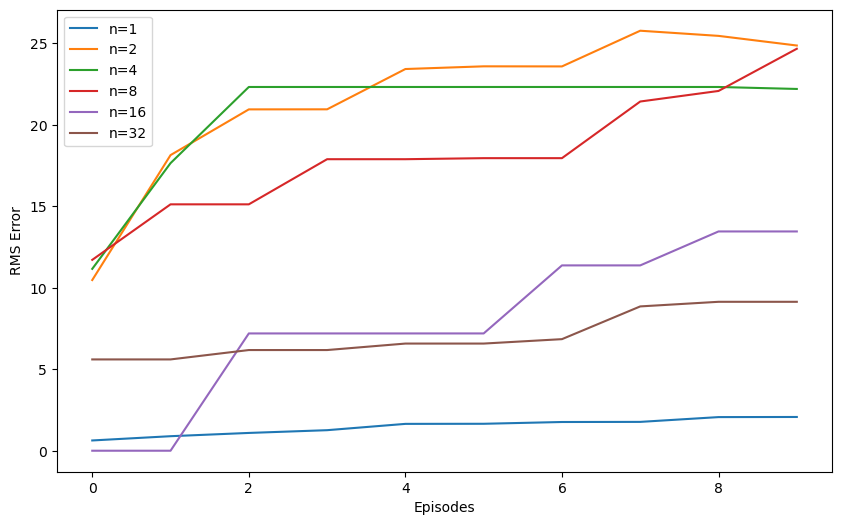

In [42]:
import numpy as np
from gridworld_lec4 import GridWorld
from gw_lec4 import GridWorld5x5  # Import GridWorld5x5
import matplotlib.pyplot as plt

def sarsa_n(grid, n, alpha=0.05, gamma=0.95, epsilon=0.1, episodes=10, max_steps=50):
    # Initialize Q-values for all states and actions
    Q = {}
    for state in grid.all_states():
        actions = grid.actions(state)
        if actions:
            Q[state] = {action: 0 for action in actions}

    all_states = [state for state in grid.all_states() if grid.actions(state)]
    rms_errors = []  # To store RMS errors over episodes

    for episode in range(episodes):
        grid.reset()
        state = grid.get_state()
        actions = grid.actions(state)

        if not actions:
            continue

        action = epsilon_greedy(Q, state, actions, epsilon)
        states = [state]
        actions_list = [action]
        rewards = [0]

        T = float('inf')
        t = 0
        tau = 0
        loop_limit = max_steps * 10
        loop_counter = 0

        while tau < T:
            if loop_counter > loop_limit:
                break
            loop_counter += 1

            if t < T:
                next_state, reward = grid.move(actions_list[-1])
                next_actions = grid.actions(next_state)

                if next_actions and not grid.game_over():
                    next_action = epsilon_greedy(Q, next_state, next_actions, epsilon)
                else:
                    next_action = None

                states.append(next_state)
                rewards.append(reward)
                actions_list.append(next_action)

                if grid.game_over() or t >= max_steps - 1:
                    T = t + 1
                t += 1

            tau = t - n
            if tau >= 0:
                if tau + n < len(states) and actions_list[tau + n] is not None:
                    G = sum(gamma ** (i - tau - 1) * rewards[i] for i in range(tau + 1, min(t + 1, T + 1)))
                    G += gamma ** n * Q[states[tau + n]][actions_list[tau + n]]
                else:
                    G = sum(gamma ** (i - tau - 1) * rewards[i] for i in range(tau + 1, min(t + 1, T + 1)))

                state_tau = states[tau]
                action_tau = actions_list[tau]
                if action_tau is not None:
                    Q[state_tau][action_tau] += alpha * (G - Q[state_tau][action_tau])

            tau += 1

        if all_states:
            rms_error = np.sqrt(np.mean([np.mean([Q[state][action] ** 2 for action in Q[state]]) for state in all_states]))
            rms_errors.append(rms_error)

    return rms_errors

def epsilon_greedy(Q, state, actions, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        q_values = [Q[state][action] for action in actions]
        max_q = max(q_values)
        max_actions = [action for action, q in zip(actions, q_values) if q == max_q]
        return np.random.choice(max_actions)

if __name__ == '__main__':
    n_values = [1, 2, 4, 8, 16, 32] 
    episodes = 10 
    alpha = 0.05  
    gamma = 0.95  
    epsilon = 0.1
    max_steps = 50

    grid = GridWorld5x5(p=0.5)

    plt.figure(figsize=(10, 6))

    for n in n_values:
        rms_errors = sarsa_n(grid, n, alpha, gamma, epsilon, episodes, max_steps)
        print(f"n={n}, RMS Errors: {rms_errors}")
        if rms_errors:
            plt.plot(np.arange(len(rms_errors)), rms_errors, label=f'n={n}')

    plt.xlabel('Episodes')
    plt.ylabel('RMS Error')
    plt.legend()
    plt.show()


Didn't do MC for problem 4.